## Comparison between Direct Path and Evolutionary Algorithm

In [18]:
import src.rna_structure as rs
import src.evolution as ev
import src.path_finding as pf
from src.utils import plot_energy_profiles
import src.example_rna as ex

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Base pair distance between structures: 4
Attempt 1: path length = 571, energy barrier = 99993.60 - Skipping (above threshold)
Attempt 2: path length = 47, energy barrier = 99993.60 - Skipping (above threshold)
Attempt 3: path length = 99, energy barrier = 99993.60 - Skipping (above threshold)
Attempt 4: path length = 23, energy barrier = 99993.60 - Skipping (above threshold)
Attempt 5: path length = 59, energy barrier = 99993.60 - Skipping (above threshold)
Attempt 6: path length = 25, energy barrier = 99993.60 - Skipping (above threshold)
Attempt 7: path length = 15, energy barrier = 2.50
New best barrier: 2.50
Attempt 8: path length = 9, energy barrier = 0.50
New best barrier: 0.50
Attempt 9: path length = 29, energy barrier = 0.70
Attempt 10: path length = 9, energy barrier = 2.50


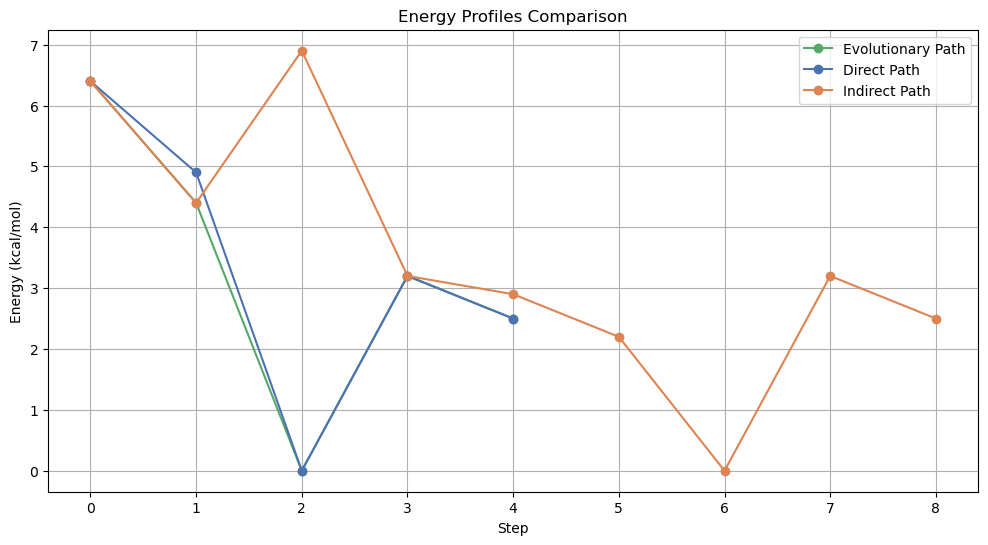

Evolutionary Path:
- Initial energy: 6.40 kcal/mol
- Final energy: 2.50 kcal/mol
- Maximum energy: 6.40 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 5 steps

Direct Path:
- Initial energy: 6.40 kcal/mol
- Final energy: 2.50 kcal/mol
- Maximum energy: 6.40 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 5 steps

Indirect Path:
- Initial energy: 6.40 kcal/mol
- Final energy: 2.50 kcal/mol
- Maximum energy: 6.90 kcal/mol
- Energy barrier: 0.50 kcal/mol
- Path length: 9 steps


In [19]:
# Short Example
seq = ex.SHORT_SEQ
start_struct = ex.SHORT_START_STRUCT
end_struct = ex.SHORT_END_STRUCT

start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)

# Get direct path
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get indirect path
indirect_path = pf.find_best_indirect_path(start_structure, end_structure)
indirect_path = [struct.to_dotbracket() for struct in indirect_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=100, max_steps=100)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, evolutionary_path, direct_path, indirect_path)

Base pair distance between structures: 21
Attempt 1: path length = 36, energy barrier = 0.00
New best barrier: 0.00
Attempt 2: path length = 1288, energy barrier = 399983.09 - Skipping (above threshold)
Attempt 3: path length = 2216, energy barrier = 499976.81 - Skipping (above threshold)
Attempt 4: path length = 2216, energy barrier = 499987.69 - Skipping (above threshold)
Attempt 5: path length = 54, energy barrier = 0.00
Attempt 6: path length = 254, energy barrier = 199988.70 - Skipping (above threshold)
Attempt 7: path length = 2216, energy barrier = 399992.50 - Skipping (above threshold)
Attempt 8: path length = 2216, energy barrier = 499979.69 - Skipping (above threshold)
Attempt 9: path length = 2214, energy barrier = 399988.19 - Skipping (above threshold)
Attempt 10: path length = 268, energy barrier = 199985.41 - Skipping (above threshold)
Attempt 11: path length = 1706, energy barrier = 399982.41 - Skipping (above threshold)
Attempt 12: path length = 120, energy barrier = 19

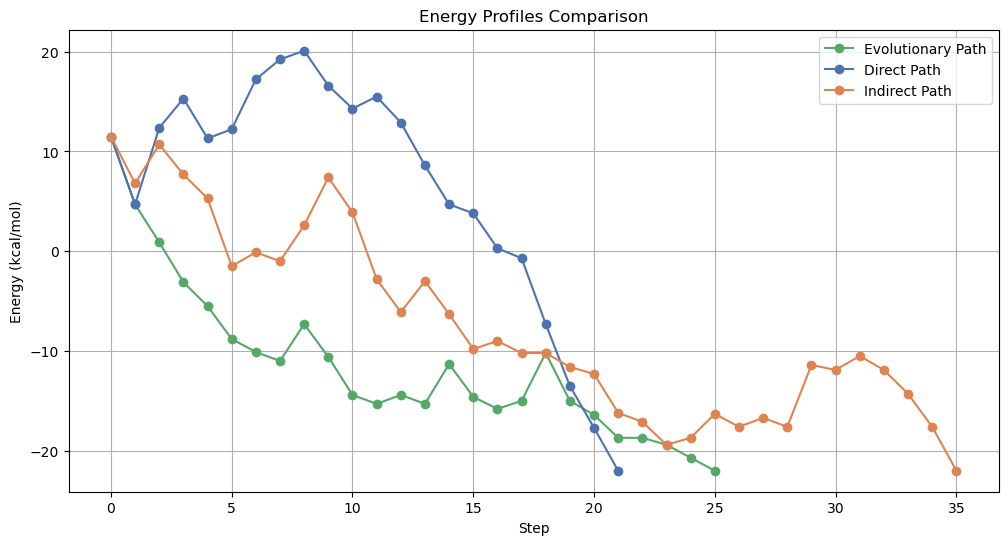

Evolutionary Path:
- Initial energy: 11.50 kcal/mol
- Final energy: -22.00 kcal/mol
- Maximum energy: 11.50 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 26 steps

Direct Path:
- Initial energy: 11.50 kcal/mol
- Final energy: -22.00 kcal/mol
- Maximum energy: 20.10 kcal/mol
- Energy barrier: 8.60 kcal/mol
- Path length: 22 steps

Indirect Path:
- Initial energy: 11.50 kcal/mol
- Final energy: -22.00 kcal/mol
- Maximum energy: 11.50 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 36 steps


In [20]:
# Long Example
seq = ex.LONG_SEQ
start_struct = ex.LONG_START_STRUCT
end_struct = ex.LONG_END_STRUCT

start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)

# Get direct path
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get indirect path
indirect_path = pf.find_best_indirect_path(start_structure, end_structure)
indirect_path = [struct.to_dotbracket() for struct in indirect_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=200, max_steps=50)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, evolutionary_path, direct_path, indirect_path)

Base pair distance between structures: 32
Attempt 1: path length = 1927, energy barrier = 300020.71 - Skipping (above threshold)
Attempt 2: path length = 1749, energy barrier = 400029.71 - Skipping (above threshold)
Attempt 3: path length = 173, energy barrier = 36.20
New best barrier: 36.20
Attempt 4: path length = 1799, energy barrier = 300037.21 - Skipping (above threshold)
Attempt 5: path length = 423, energy barrier = 200019.71 - Skipping (above threshold)
Attempt 6: path length = 581, energy barrier = 300027.30 - Skipping (above threshold)
Attempt 7: path length = 2329, energy barrier = 400027.08 - Skipping (above threshold)
Attempt 8: path length = 213, energy barrier = 100032.90 - Skipping (above threshold)
Attempt 9: path length = 2325, energy barrier = 300027.71 - Skipping (above threshold)
Attempt 10: path length = 373, energy barrier = 200021.89 - Skipping (above threshold)
Attempt 11: path length = 1975, energy barrier = 300028.80 - Skipping (above threshold)
Attempt 12: p

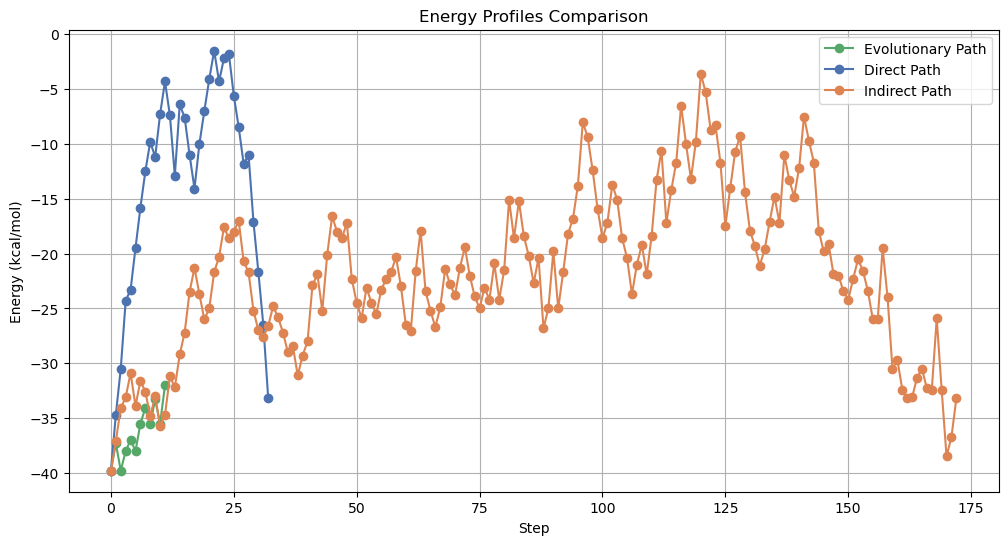

Evolutionary Path:
- Initial energy: -39.80 kcal/mol
- Final energy: -32.00 kcal/mol
- Maximum energy: -32.00 kcal/mol
- Energy barrier: 7.80 kcal/mol
- Path length: 12 steps

Direct Path:
- Initial energy: -39.80 kcal/mol
- Final energy: -33.20 kcal/mol
- Maximum energy: -1.50 kcal/mol
- Energy barrier: 38.30 kcal/mol
- Path length: 33 steps

Indirect Path:
- Initial energy: -39.80 kcal/mol
- Final energy: -33.20 kcal/mol
- Maximum energy: -3.60 kcal/mol
- Energy barrier: 36.20 kcal/mol
- Path length: 173 steps


In [21]:
# Long Example
seq = ex.MED_SEQ
start_struct = ex.MED_START_STRUCT
end_struct = ex.MED_END_STRUCT

start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)

# Get direct path
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get indirect path
indirect_path = pf.find_best_indirect_path(start_structure, end_structure)
indirect_path = [struct.to_dotbracket() for struct in indirect_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=200, max_steps=100)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, evolutionary_path, direct_path, indirect_path)

Base pair distance between structures: 30
Attempt 1: path length = 1407, energy barrier = 199995.65 - Skipping (above threshold)
Attempt 2: path length = 1313, energy barrier = 299988.43 - Skipping (above threshold)
Attempt 3: path length = 2307, energy barrier = 199991.15 - Skipping (above threshold)
Attempt 4: path length = 2315, energy barrier = 399998.96 - Skipping (above threshold)
Attempt 5: path length = 2311, energy barrier = 300008.93 - Skipping (above threshold)
Attempt 6: path length = 75, energy barrier = 199991.94 - Skipping (above threshold)
Attempt 7: path length = 425, energy barrier = 299988.43 - Skipping (above threshold)
Attempt 8: path length = 1829, energy barrier = 399996.43 - Skipping (above threshold)
Attempt 9: path length = 327, energy barrier = 199993.54 - Skipping (above threshold)
Attempt 10: path length = 2309, energy barrier = 400005.52 - Skipping (above threshold)
Attempt 11: path length = 759, energy barrier = 400005.65 - Skipping (above threshold)
Atte

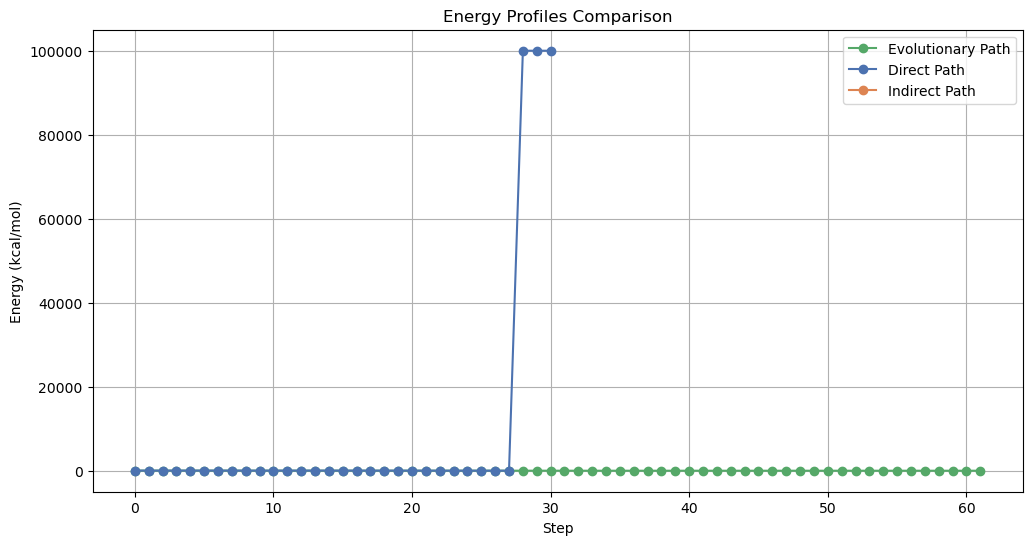

Evolutionary Path:
- Initial energy: -8.24 kcal/mol
- Final energy: -34.20 kcal/mol
- Maximum energy: -8.24 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 62 steps

Direct Path:
- Initial energy: -8.24 kcal/mol
- Final energy: 99974.70 kcal/mol
- Maximum energy: 99974.70 kcal/mol
- Energy barrier: 99982.94 kcal/mol
- Path length: 31 steps

Indirect Path:


IndexError: list index out of range

In [22]:
# Long Example
seq = ex.VLONG_SEQ
start_struct = ex.VLONG_START_STRUCT
end_struct = ex.VLONG_END_STRUCT

start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)

# Get direct path
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get indirect path
indirect_path = pf.find_best_indirect_path(start_structure, end_structure)
indirect_path = [struct.to_dotbracket() for struct in indirect_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=200, max_steps=100)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, evolutionary_path, direct_path, indirect_path)

Base pair distance between structures: 23
Attempt 1: path length = 102, energy barrier = 100015.20
New best barrier: 100015.20
Attempt 2: path length = 274, energy barrier = 299999.99
Attempt 3: path length = 120, energy barrier = 100007.80
New best barrier: 100007.80
Attempt 4: path length = 330, energy barrier = 100011.30
Attempt 5: path length = 64, energy barrier = 18.40
New best barrier: 18.40
Attempt 6: path length = 346, energy barrier = 100029.40
Attempt 7: path length = 292, energy barrier = 200011.81
Attempt 8: path length = 1186, energy barrier = 300019.09
Attempt 9: path length = 1238, energy barrier = 400030.21
Attempt 10: path length = 250, energy barrier = 200029.90
Attempt 11: path length = 1234, energy barrier = 400019.71
Attempt 12: path length = 118, energy barrier = 100003.60

Generation 10:
{'structure': '((((((((.((((.......)))).(((((((...))))))).......(((.......))).)))))))).', 'distance': 25, 'highest_energy': 0.5, 'path': ['(((((((..((((.......)))).(((((.......)

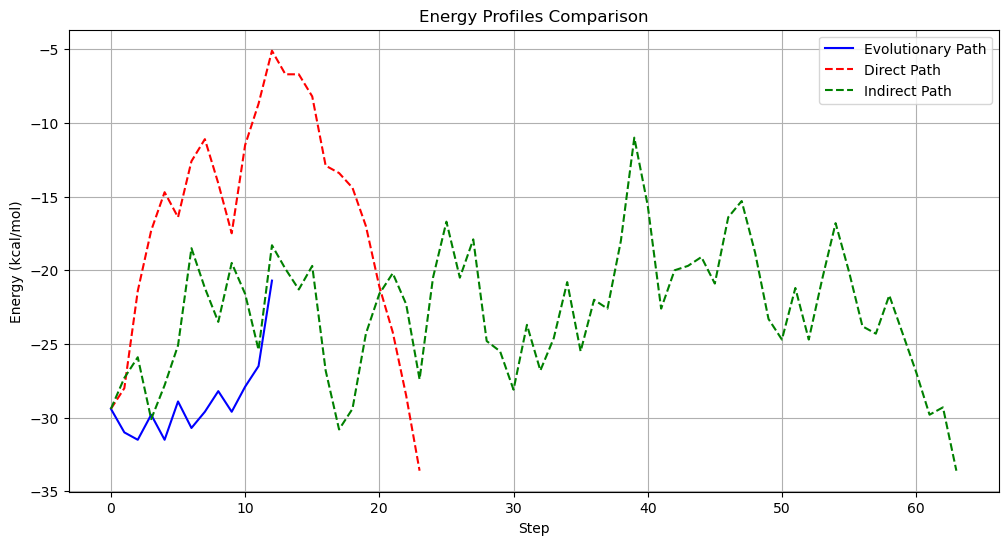

Evolutionary Path:
- Initial energy: -29.40 kcal/mol
- Final energy: -20.70 kcal/mol
- Maximum energy: -20.70 kcal/mol
- Energy barrier: 8.70 kcal/mol
- Path length: 13 steps

Direct Path:
- Initial energy: -29.40 kcal/mol
- Final energy: -33.60 kcal/mol
- Maximum energy: -5.10 kcal/mol
- Energy barrier: 24.30 kcal/mol
- Path length: 24 steps

Indirect Path:
- Initial energy: -29.40 kcal/mol
- Final energy: -33.60 kcal/mol
- Maximum energy: -11.00 kcal/mol
- Energy barrier: 18.40 kcal/mol
- Path length: 64 steps


In [6]:
# Long Example
seq = ex.ANOTHER_SEQ
start_struct = ex.ANOTHER_START_STRUCT
end_struct = ex.ANOTHER_END_STRUCT

start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)

# Get direct path
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get indirect path
indirect_path = pf.find_best_indirect_path(start_structure, end_structure)
indirect_path = [struct.to_dotbracket() for struct in indirect_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=200, max_steps=100)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, evolutionary_path, direct_path, indirect_path)

Base pair distance between structures: 11
Attempt 1: path length = 48, energy barrier = 100008.30
New best barrier: 100008.30
Attempt 2: path length = 204, energy barrier = 200015.60
Attempt 3: path length = 76, energy barrier = 100006.30
New best barrier: 100006.30
Attempt 4: path length = 36, energy barrier = 12.70
New best barrier: 12.70
Attempt 5: path length = 60, energy barrier = 100023.80
Attempt 6: path length = 42, energy barrier = 11.30
New best barrier: 11.30
Attempt 8: path length = 44, energy barrier = 18.40
Attempt 9: path length = 28, energy barrier = 12.90
Attempt 10: path length = 418, energy barrier = 200006.10
Attempt 11: path length = 260, energy barrier = 100008.20

Generation 10:
{'structure': '(((...(((((((.((((((((.(((.(((..........).)).))))))))))).)))))))...)))', 'distance': 8, 'highest_energy': 1.5, 'path': ['......(((((((.(((((((.((((.((.............)).))))))))))).)))))))......', '..(...(((((((.(((((((.((((.((.............)).))))))))))).)))))))...)..', '.((..

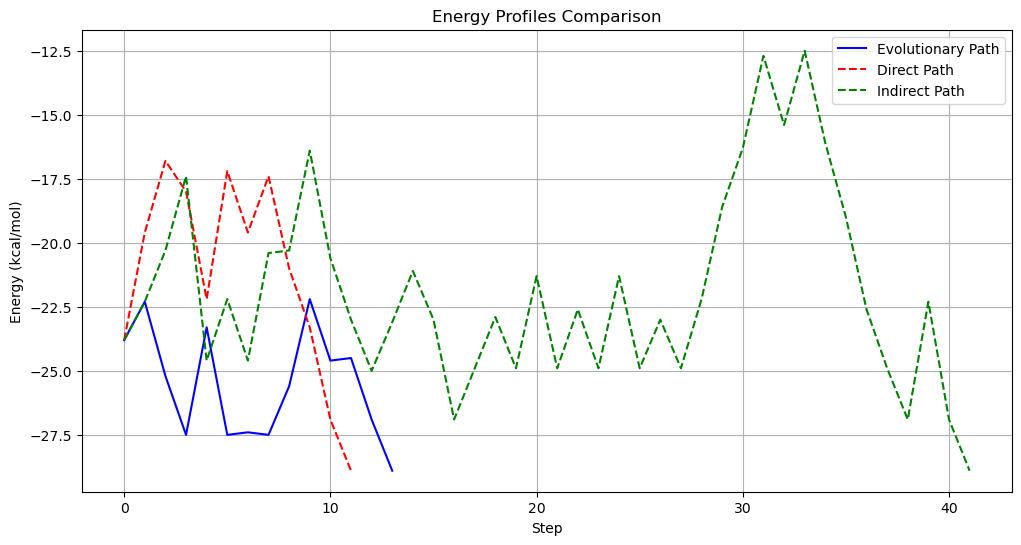

Evolutionary Path:
- Initial energy: -23.80 kcal/mol
- Final energy: -28.90 kcal/mol
- Maximum energy: -22.20 kcal/mol
- Energy barrier: 1.60 kcal/mol
- Path length: 14 steps

Direct Path:
- Initial energy: -23.80 kcal/mol
- Final energy: -28.90 kcal/mol
- Maximum energy: -16.80 kcal/mol
- Energy barrier: 7.00 kcal/mol
- Path length: 12 steps

Indirect Path:
- Initial energy: -23.80 kcal/mol
- Final energy: -28.90 kcal/mol
- Maximum energy: -12.50 kcal/mol
- Energy barrier: 11.30 kcal/mol
- Path length: 42 steps


In [7]:
# Long Example
seq = ex.MOD_SEQ
start_struct = ex.MOD_START_STRUCT
end_struct = ex.MOD_END_STRUCT

start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)

# Get direct path
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get indirect path
indirect_path = pf.find_best_indirect_path(start_structure, end_structure)
indirect_path = [struct.to_dotbracket() for struct in indirect_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=200, max_steps=100)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, evolutionary_path, direct_path, indirect_path)